In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gold_data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/gold_price.csv")
gold_data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [5]:
gold_data.to_csv('gold_price.csv')

In [6]:
df = pd.read_csv('gold_price.csv')
df.head()

,Unnamed: 0,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)',
       'EURO (AM)', 'EURO (PM)'],
      dtype='object')

In [8]:
df = df[['Date', 'USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)',
       'EURO (AM)', 'EURO (PM)']]

In [9]:
df.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USD (AM),4718.0,959.990812,449.456217,256.700,449.11250,1113.1250,1293.75000,1896.50
USD (PM),4682.0,959.728684,449.487106,255.950,448.61250,1112.2750,1294.22500,1895.00
GBP (AM),4718.0,625.068432,324.491391,176.572,244.57675,717.1450,939.06550,1265.90
GBP (PM),4682.0,624.921846,324.544149,176.441,244.46350,716.2105,939.26650,1265.01
EURO (AM),4718.0,773.892791,351.555806,276.711,361.39350,874.3545,1085.96775,1389.89
EURO (PM),4682.0,773.843716,351.696708,277.667,361.33875,875.1415,1085.81625,1392.03


In [11]:
df.shape

(4718, 7)

In [12]:
import missingno

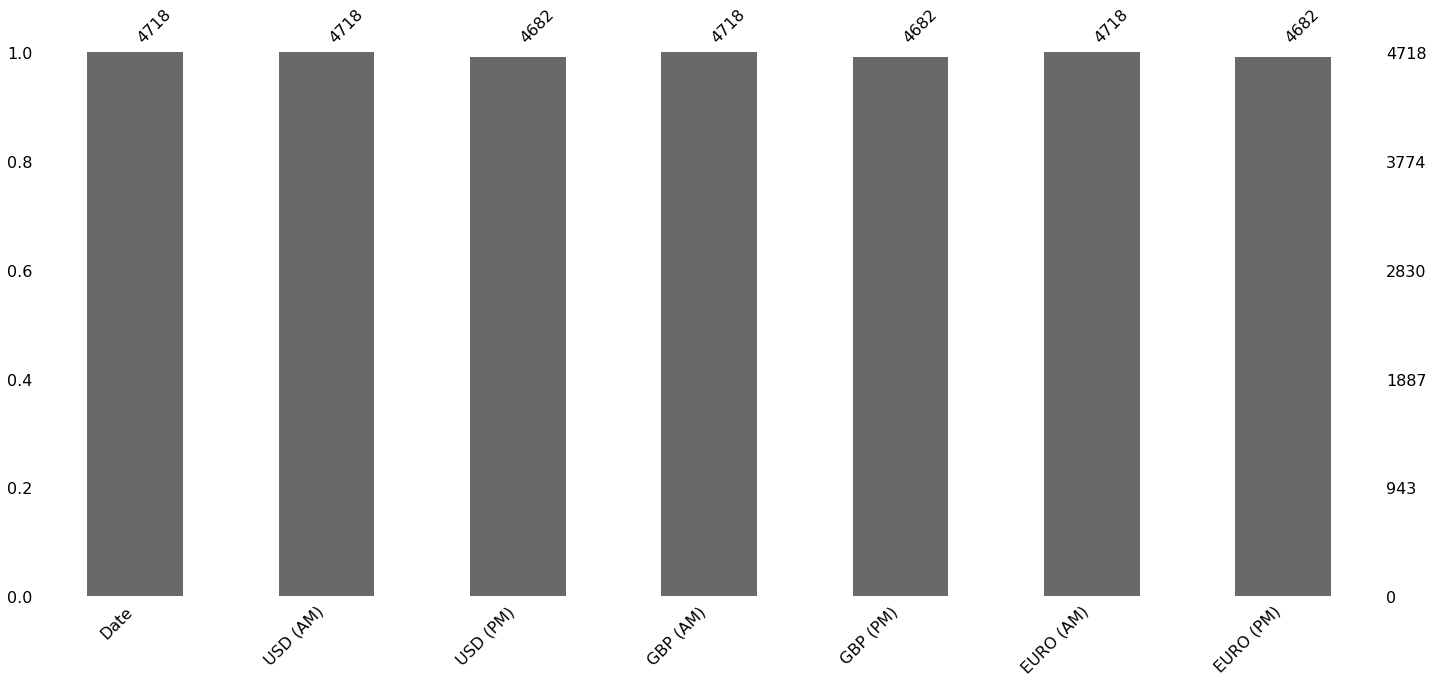

In [13]:
fig = missingno.bar(df)

In [14]:
df.isna().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

<AxesSubplot:>

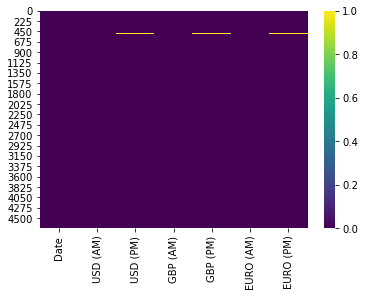

In [15]:
sns.heatmap(df.isna(), cmap='viridis')

In [16]:
df['USD (AM)'].ffill().where(df.bfill().notnull())

0        272.80
1        269.00
2        268.75
3        268.00
4        268.60
         ...   
4713    1531.85
4714    1541.75
4715    1536.65
4716    1526.55
4717    1523.35
Name: USD (AM), Length: 4718, dtype: float64

<AxesSubplot:>

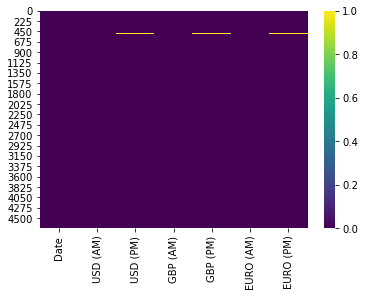

In [17]:
sns.heatmap(df.isna(), cmap='viridis')

In [18]:

df['GBP (PM)'] = df['GBP (PM)'].ffill().where(df.bfill().notnull())
df['EURO (PM)'] = df['EURO (PM)'].bfill().where(df.bfill().notnull())

In [19]:
df.isna().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)      0
EURO (AM)     0
EURO (PM)     0
dtype: int64

In [20]:
df['USD (PM)'] = df['USD (PM)'].fillna(df['USD (PM)'].median())

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USD (AM),4718.0,959.990812,449.456217,256.700,449.11250,1113.1250,1293.75000,1896.50
USD (PM),4718.0,960.892666,447.965344,255.950,453.60000,1112.2750,1293.03750,1895.00
GBP (AM),4718.0,625.068432,324.491391,176.572,244.57675,717.1450,939.06550,1265.90
GBP (PM),4718.0,624.897444,324.404764,176.441,244.61200,715.9540,939.21200,1265.01
EURO (AM),4718.0,773.892791,351.555806,276.711,361.39350,874.3545,1085.96775,1389.89
EURO (PM),4718.0,773.819690,351.565972,277.667,361.45425,875.1415,1085.81625,1392.03


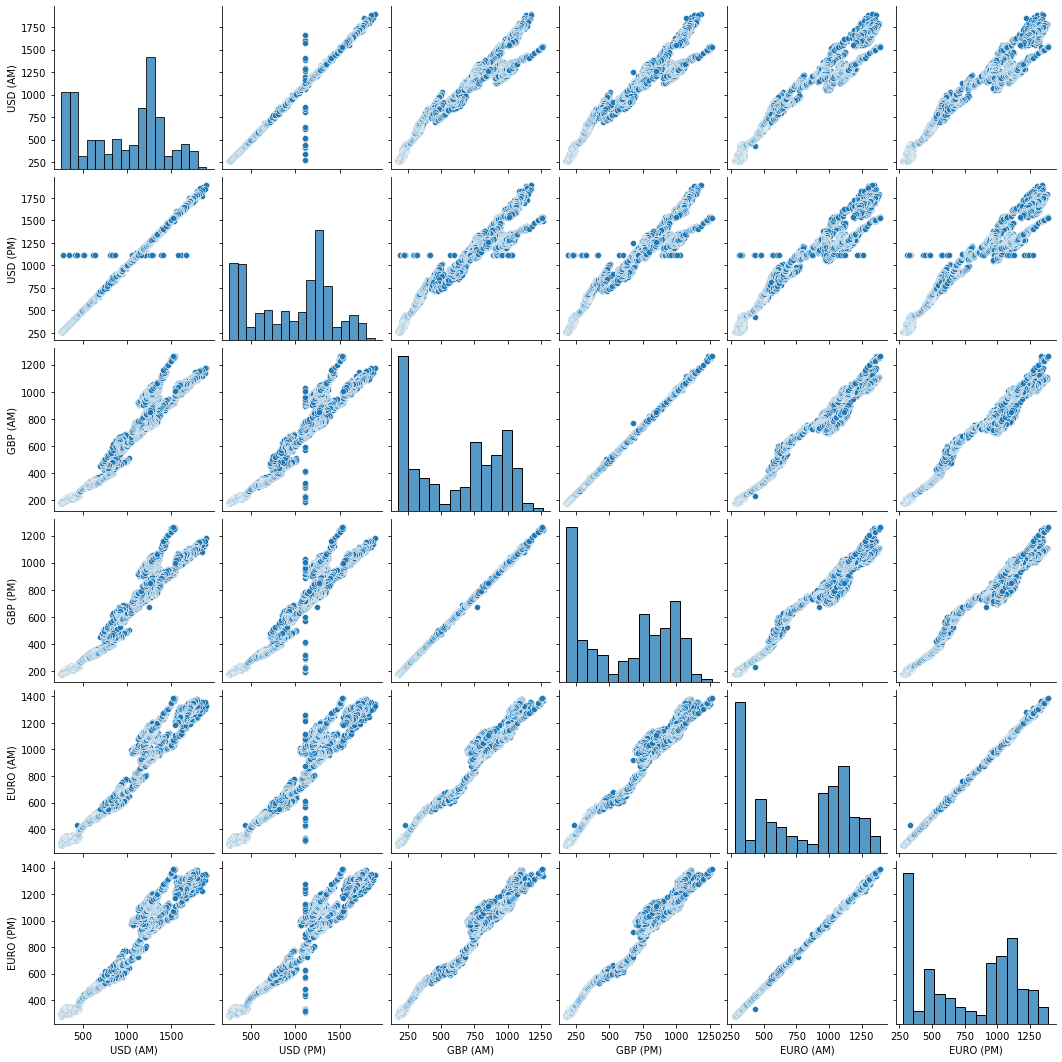

In [22]:
sns.pairplot(df)

In [23]:
df['USD_price'] = df['USD (PM)'].pct_change()*100

In [24]:
df['Lag_return'] = df.USD_price.shift()

In [25]:
df = df.dropna()

In [26]:
df['Date'].unique()

array(['2001-01-04', '2001-01-05', '2001-01-08', ..., '2019-08-29',
       '2019-08-30', '2019-09-02'], dtype=object)

In [27]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

<ipython-input-27-b61d16208d4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.DatetimeIndex(df['Date']).year


In [28]:
df.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),USD_price,Lag_return,Year
2,2001-01-04,268.75,267.1,178.869,178.352,282.538,282.049,-0.018716,-1.457027,2001
3,2001-01-05,268.00,267.4,178.488,178.148,280.775,280.882,0.112317,-0.018716,2001
4,2001-01-08,268.60,268.3,178.769,178.664,282.410,282.481,0.336574,0.112317,2001
5,2001-01-09,267.75,267.0,179.855,179.195,284.507,283.590,-0.484532,0.336574,2001
6,2001-01-10,266.70,266.3,178.777,178.665,283.573,283.298,-0.262172,-0.484532,2001


In [29]:
df['Year'].dtype

dtype('int64')

In [32]:
train = df[df['Year'] >= 2018]
test = df[df['Year'] == 2019]

In [33]:
X_train = train['Lag_return'].to_frame()
y_train = train['USD_price']
X_test = test['Lag_return'].to_frame()
y_test = test['USD_price']

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV, ElasticNet

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
import pickle
file_name = "gold_price.pickle"
try:
    pickle.dump(model, open(file_name, 'wb'))
except Exception as e:
    print(e)

In [44]:
pickle_model = pickle.load(open(file_name, 'rb'))

In [38]:
predictions = model.predict(X_test)
predictions

array([ 5.54811239e+00, -6.28400703e+00, -1.32857048e-01,  4.53439469e-01,
       -2.88182962e-01,  2.98086645e-01,  4.28515277e-02,  5.75478962e-03,
        2.07755579e-01, -1.03913910e-02,  5.93187730e-02,  1.80189657e-01,
        1.64166342e-01,  3.22532148e-01,  2.63525506e-01,  2.94405273e-02,
        1.87343302e-01, -1.45284598e-02, -2.18783162e-01, -1.53329438e-01,
       -6.03810910e-02,  1.20859258e-02, -2.86719798e-01,  2.55918641e-01,
        3.19654403e-01,  4.73942945e-02,  1.69651793e-01,  1.88793514e-01,
       -4.18380957e-02,  3.80515771e-01, -2.36570995e-03,  2.34144818e-02,
        1.55419512e-01, -4.96162412e-02, -1.70925921e-01, -1.59574419e-01,
       -1.87501788e-01,  5.00428219e-01,  1.81449306e-01,  4.97913910e-02,
        3.00502788e-01,  1.81771737e-01,  2.29168867e-01,  3.40130082e-01,
        9.56384304e-01,  1.64443471e-01,  4.59556908e-02,  1.30375544e-01,
       -2.58923494e-01,  2.41163014e-01, -2.61576684e-02, -2.05728492e-01,
        4.76254762e-01, -

In [76]:
pickle_model.predict([[2020]])

array([-842.18682887])

In [51]:
model.score(X_train, y_train)

0.20133161045068604

D:\anaconda_folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

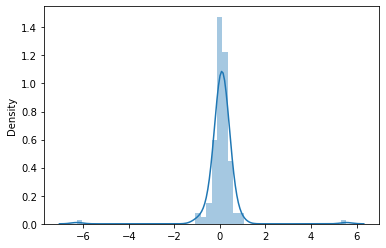

In [39]:
sns.distplot(predictions)

In [52]:
import statsmodels.formula.api as smf

In [53]:
lm = smf.ols(formula='USD_price ~ Lag_return', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              USD_price   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     442.8
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           4.87e-94
Time:                        09:01:23   Log-Likelihood:                -17474.
No. Observations:                4716   AIC:                         3.495e+04
Df Residuals:                    4714   BIC:                         3.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4559      0.143      3.180      0.001       0.175       0.737
Lag_return    -0.2930      0.014    -21.044      0.000      -0.320      -0.266
==============================================================================
Omnibus:                    10731.975   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         60070673.839
Skew:                          21.731   Prob(JB):                         0.00
Kurtosis:                     554.193   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [55]:
alpha = lasscv.alpha_
alpha

3.722954166745897e-05

In [57]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=3.722954166745897e-05)

In [58]:
lasso_reg.score(X_test, y_test)

0.22464307292026775

In [59]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([8.41246353, 6.19688251, 9.83429369, 5.16377443, 1.80892849,
       6.99450246, 1.05538934, 3.43420899, 6.48027493, 8.79746369,
       1.5891837 , 2.13808152, 6.79325046, 2.75849014, 4.92881163,
       2.20965443, 6.14242329, 1.04826405, 1.11101881, 3.0871685 ,
       4.06579923, 3.54063061, 3.00243667, 7.92401463, 5.08522229,
       1.48059969, 6.97927609, 6.4893147 , 8.6974766 , 0.26207122,
       1.49800812, 2.91813714, 5.99105854, 6.53592301, 5.03232766,
       5.14659604, 6.40888453, 8.66058766, 8.36179745, 5.99791828,
       7.47674751, 8.59189385, 0.30251925, 8.73182329, 7.25301729,
       9.35935222, 9.5234442 , 0.20006622, 3.81510516, 8.70299155]),
        cv=10, normalize=True)

In [61]:
ridgecv.alpha_

9.834293694888776

In [62]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=9.834293694888776)

In [65]:
ridge_model.score(X_train, y_train)

0.20132208113269112

In [69]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [71]:
elasticCV.alpha_

0.0028054512093681257

In [72]:
elasticCV.l1_ratio

0.5

In [74]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.0028054512093681257)

In [75]:
elasticnet_reg.score(X_test, y_test)

0.22469461471986896